<a href="https://colab.research.google.com/github/khanabdullahbelal/Data-Structure/blob/main/Anomaly_Detection_%26_Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomaly Detection & Time Series |
Assignment

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

**1)** Anomaly Detection is a technique used to identify unusual or abnormal data points. It includes **point anomalies**, **contextual anomalies**, and **collective anomalies**.

**2)** It is mainly used to detect fraud, errors, or abnormal behavior in data.

**Example:** A sudden ₹5,00,000 transaction from a small savings account is a point anomaly.


Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

**1)** **Isolation Forest** isolates anomalies using random splits and works well for large, high-dimensional datasets; **DBSCAN** is density-based and detects anomalies as points in low-density areas; **LOF (Local Outlier Factor)** compares a point’s local density with its neighbors to find local outliers.

**2)** Isolation Forest is suitable for fraud detection and big data; DBSCAN is good for spatial or clustering problems; LOF is useful when detecting local density differences in data.

**Example:** In credit card fraud detection with millions of transactions, **Isolation Forest** is commonly used because it handles large datasets efficiently.


Question 3: What are the key components of a Time Series? Explain each with one
example.

**1)** The key components of a Time Series are **Trend** (long-term upward or downward movement), **Seasonality** (regular repeating pattern over fixed intervals), **Cyclical** (long-term fluctuations without fixed period), and **Irregular/Noise** (random variations).

**2)** These components help in understanding patterns and improving forecasting accuracy.

**Example:** Monthly ice cream sales increasing every year (Trend), rising every summer (Seasonality), affected by economic cycles (Cyclical), and sudden drop due to heavy rain (Irregular).


Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

**1)** A time series is **stationary** if its mean, variance, and autocorrelation remain constant over time (no trend or changing seasonality).

**2)** You can test stationarity using the **ADF (Augmented Dickey-Fuller) test**, and transform a non-stationary series by applying **differencing, log transformation, or removing trend/seasonality**.

**Example:** If yearly sales keep increasing (non-stationary), applying first-order differencing (subtracting previous value from current value) can make it stationary.


Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

**1)** **AR (AutoRegressive)** uses past values to predict future values; **MA (Moving Average)** uses past forecast errors; **ARIMA** combines AR and MA with differencing for non-stationary data; **SARIMA** extends ARIMA by adding seasonal components; **SARIMAX** further includes external (exogenous) variables.

**2)** AR and MA are used for simple stationary series; ARIMA is for non-stationary data; SARIMA is for seasonal time series; SARIMAX is used when external factors influence the series.

**Example:** Predicting monthly sales affected by both season (festivals) and advertising budget can be modeled using **SARIMAX**.


Dataset:
● NYC Taxi Fare Data
● AirPassengers Dataset

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components
(Include your Python code and output in the code box below.

Saving AirPassengers.csv to AirPassengers.csv


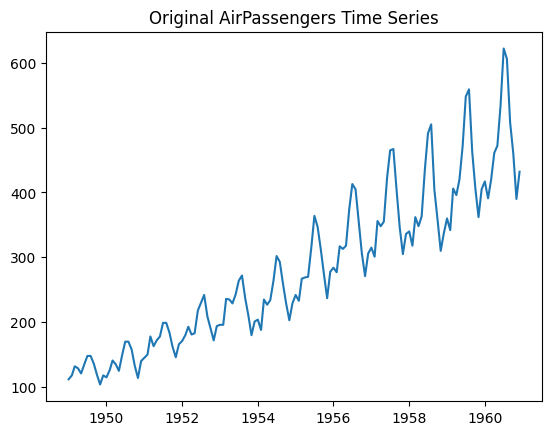

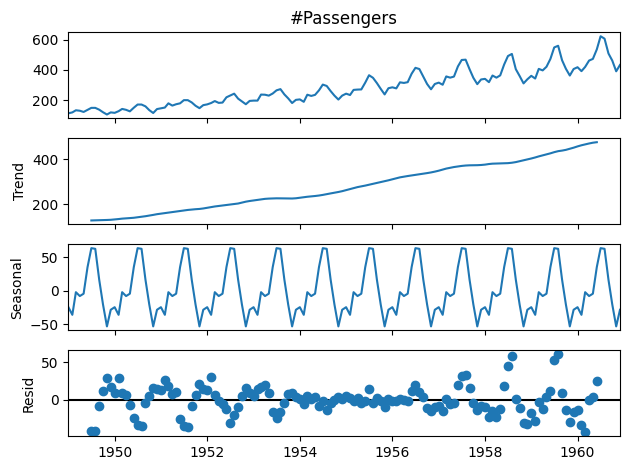

In [2]:
# Step 1: Upload file manually
from google.colab import files
uploaded = files.upload()

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 3: Load the uploaded CSV file
data = pd.read_csv("AirPassengers.csv")

# Convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot original series
plt.figure()
plt.plot(data['#Passengers'])
plt.title("Original AirPassengers Time Series")
plt.show()

# Decompose
decomposition = seasonal_decompose(data['#Passengers'], model='additive')
decomposition.plot()
plt.show()

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [12]:
from google.colab import files

# Upload file from your computer
uploaded = files.upload()

# Check uploaded files
import os
print(os.listdir('/content'))

Saving NYC_taxi_fare_data2.csv to NYC_taxi_fare_data2.csv
['.config', 'NYC_taxi_fare_data2.csv', 'AirPassengers.csv', 'sample_data']


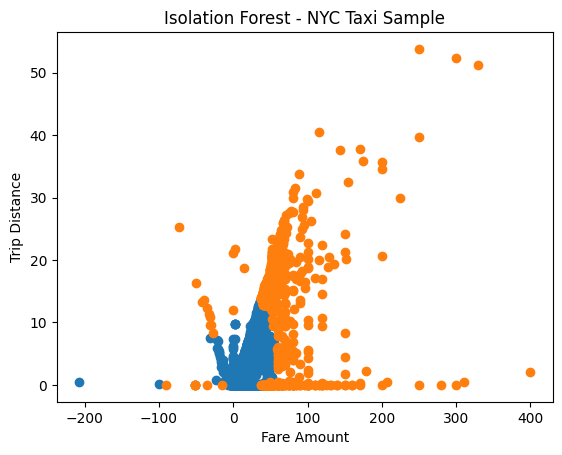

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load only 50,000 rows for speed
data = pd.read_csv("/content/NYC_taxi_fare_data2.csv", nrows=50000)

# Select important numerical columns
data = data[['fare_amount', 'trip_distance']].dropna()

# Apply Isolation Forest
model = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = model.fit_predict(data)

# Separate normal and anomalies
normal = data[data['anomaly'] == 1]
anomaly = data[data['anomaly'] == -1]

# Plot
plt.figure()
plt.scatter(normal['fare_amount'], normal['trip_distance'])
plt.scatter(anomaly['fare_amount'], anomaly['trip_distance'])
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.title("Isolation Forest - NYC Taxi Sample")
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


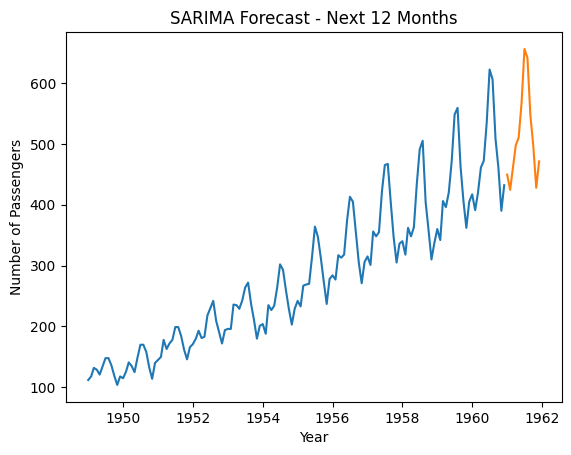

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset (make sure AirPassengers.csv is uploaded)
data = pd.read_csv("/content/AirPassengers.csv")

# Convert Month to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Train SARIMA model (example parameters)
model = SARIMAX(data['#Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))
results = model.fit()

# Forecast next 12 months
forecast = results.forecast(steps=12)

# Plot original data and forecast
plt.figure()
plt.plot(data['#Passengers'])
plt.plot(forecast)
plt.title("SARIMA Forecast - Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

 Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


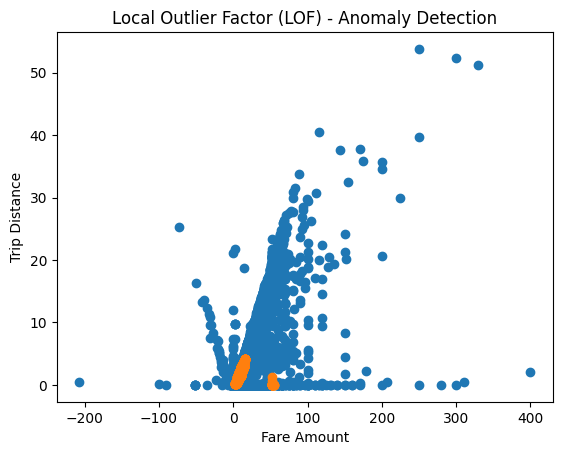

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load sample taxi dataset (use smaller file for speed)
data = pd.read_csv("/content/NYC_taxi_fare_data2.csv", nrows=50000)

# Select numerical columns
data = data[['fare_amount', 'trip_distance']].dropna()

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
data['anomaly'] = lof.fit_predict(data)

# Separate normal and anomalies
normal = data[data['anomaly'] == 1]
anomaly = data[data['anomaly'] == -1]

# Plot
plt.figure()
plt.scatter(normal['fare_amount'], normal['trip_distance'])
plt.scatter(anomaly['fare_amount'], anomaly['trip_distance'])
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?
(Include your Python code and output in the code box below.)

1) Real-Time Workflow (Anomaly Detection + Forecasting)

● For streaming 15-minute data, I would use Isolation Forest for real-time anomaly detection because it is fast, scalable, and works well with high-volume data. For short-term forecasting (next few hours/days), I would use SARIMAX, since energy demand has seasonality (daily/weekly) and external factors like weather that affect usage.

● Data pipeline: Ingest streaming data → feature engineering (lags, rolling mean, weather features) → detect anomalies → forecast next time window → trigger alerts if abnormal spike/drop is detected.

2) Validation, Monitoring & Business Impact

● Validation: Use rolling forecast validation (walk-forward method) and evaluate using MAE/RMSE. Monitor model drift, anomaly rate changes, and retrain periodically.

● Business impact: Detecting abnormal spikes prevents grid overload, forecasting helps optimize power generation, reduces cost, and improves reliability of supply.

MAE: 9.852261870928972


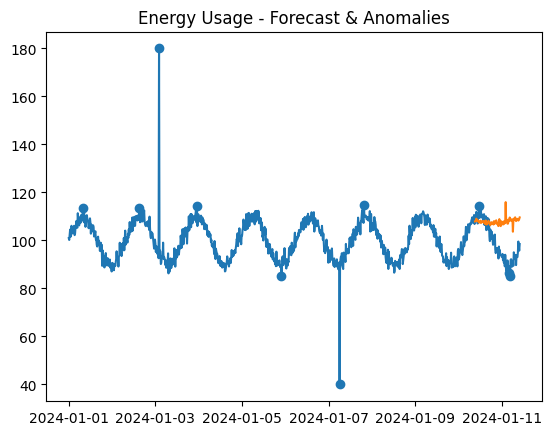

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# ----- Simulated 15-min energy data -----
np.random.seed(42)
date_range = pd.date_range(start='2024-01-01', periods=1000, freq='15min')

energy_usage = 100 + 10*np.sin(np.linspace(0, 50, 1000)) + np.random.normal(0, 2, 1000)
energy_usage[200] = 180
energy_usage[600] = 40

data = pd.DataFrame({"energy_usage": energy_usage}, index=date_range)
data = data.asfreq('15min')   # explicitly set frequency

# ----- Isolation Forest -----
iso = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = iso.fit_predict(data[['energy_usage']])

# ----- SARIMAX -----
train = data['energy_usage'][:900]
test = data['energy_usage'][900:]

model = SARIMAX(train,
                order=(1,1,1),
                seasonal_order=(1,1,1,96),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(maxiter=50, method='lbfgs', disp=False)

forecast = results.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
print("MAE:", mae)

# ----- Plot -----
plt.figure()
plt.plot(data['energy_usage'])
plt.scatter(data[data['anomaly']==-1].index,
            data[data['anomaly']==-1]['energy_usage'])
plt.plot(forecast.index, forecast)
plt.title("Energy Usage - Forecast & Anomalies")
plt.show()